In [1]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.1.1'

In [2]:
import pandas as pd

pd.__version__

'0.24.2'

In [3]:
import folium
from folium import Map
from folium.plugins import HeatMap

folium.__version__

'0.10.0'

In [4]:
import matplotlib.font_manager as fm

[font for font in fm.fontManager.ttflist if 'Noto' in font.name]

[<Font 'Noto Nastaliq Urdu' (NotoNastaliq.ttc) normal normal 400 normal>,
 <Font 'Noto Sans CJK KR' (NotoSansCJKkr-Regular.otf) normal normal regular normal>,
 <Font 'Noto Sans CJK KR' (NotoSansCJKkr-Thin.otf) normal normal 400 normal>,
 <Font 'Noto Sans CJK KR' (NotoSansCJKkr-Light.otf) normal normal light normal>,
 <Font 'Noto Sans CJK KR' (NotoSansCJKkr-Medium.otf) normal normal medium normal>,
 <Font 'Noto Sans CJK KR' (NotoSansCJKkr-DemiLight.otf) normal normal light normal>,
 <Font 'Noto Sans CJK KR' (NotoSansCJKkr-Black.otf) normal normal black normal>,
 <Font 'Noto Sans Mono CJK KR' (NotoSansMonoCJKkr-Bold.otf) normal normal bold normal>,
 <Font 'Noto Sans Mono CJK KR' (NotoSansMonoCJKkr-Regular.otf) normal normal regular normal>,
 <Font 'Noto Sans CJK KR' (NotoSansCJKkr-Bold.otf) normal normal bold normal>]

In [5]:
plt.rcParams['font.family'] = 'Noto Sans CJK KR'

전국어린이집표준데이터

<https://www.data.go.kr/dataset/15013108/standard.do>

In [6]:
df = pd.read_csv('data/child-house.csv', encoding='euc-kr', low_memory=False)

df.columns

Index(['어린이집명', '시도명', '시군구명', '어린이집유형구분', '정원수', '보육교직원수', '소재지도로명주소',
       '어린이집전화번호', '어린이집팩스번호', '보육실수', '놀이터수', 'CCTV설치수', '통학차량운영여부', '홈페이지주소',
       '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 17'],
      dtype='object')

In [7]:
df.shape

(48178, 18)

In [8]:
df.head()

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,어린이집전화번호,어린이집팩스번호,보육실수,놀이터수,CCTV설치수,통학차량운영여부,홈페이지주소,데이터기준일자,제공기관코드,제공기관명,Unnamed: 17
0,노아키즈어린이집,강원도,원주시,가정,20,5.0,"강원도 원주시 시청로 496-1 101동 102호(관설동, 코아루아파트)",033-742-1295,NaN,0.0,0.0,0.0,,NaN,2018-07-31,6420000,강원도,NaN
1,놀러와어린이집,강원도,원주시,가정,20,4.0,"강원도 원주시 봉화로 231 210동 103호 (우산동, 한라비발디2차아파트)",033-764-7600,NaN,0.0,0.0,0.0,,NaN,2018-07-31,6420000,강원도,NaN
2,꿈꾸는 어린이집,강원도,강릉시,가정,10,2.0,"강원도 강릉시 성덕포남로 89-17 503동 106호(입암동, 입암5주공아파트)",033-651-1555,NaN,2.0,0.0,3.0,N,NaN,2018-07-31,6420000,강원도,NaN
3,꿈꾸미 어린이집,강원도,강릉시,가정,18,4.0,강원도 강릉시 경강로2301번길 22 강릉7차아파트 A동 106호 (포남동),070-4098-4292,NaN,3.0,0.0,0.0,N,NaN,2018-07-31,6420000,강원도,NaN
4,꼬마대통령어린이집,강원도,동해시,가정,20,4.0,강원도 동해시 평원로 107 엘리시아 아파트 105동104호,033-533-5866,NaN,3.0,0.0,4.0,Y,NaN,2018-07-31,6420000,강원도,NaN


In [9]:
df['어린이집유형구분'].value_counts()

가정        22206
민간        17058
국공립        4168
사회복지법인     2235
직장         1335
법인·단체       995
협동          181
Name: 어린이집유형구분, dtype: int64

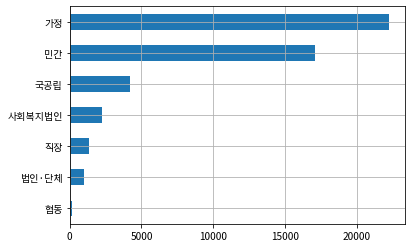

In [10]:
df['어린이집유형구분'].value_counts().sort_values().plot(kind='barh', grid=True)

plt.show()

In [11]:
df['시도명'].value_counts()

경기도        9350
경상남도       5564
서울특별시      4717
충청남도       3702
광주광역시      3515
경상북도       3355
대구광역시      2656
전라북도       2593
강원도        2254
인천광역시      2102
전라남도       2015
부산광역시      1849
울산광역시      1715
대전광역시      1169
충청북도       1124
제주특별자치도     498
Name: 시도명, dtype: int64

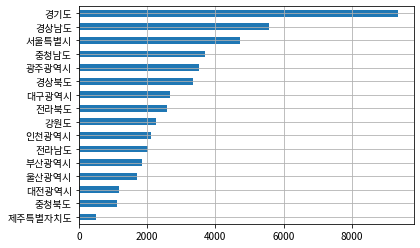

In [12]:
df['시도명'].value_counts().sort_values().plot(kind='barh', grid=True)

plt.show()

In [13]:
df['시군구명'].value_counts()

북구         2062
서구         1847
천안시        1348
광산구        1281
수원시        1136
김해시        1122
남구         1121
구미시         960
동구          934
아산시         852
양산시         771
중구          727
남양주시        676
성남시         657
원주시         650
달서구         622
부천시         598
전주시 완산구     591
전주시 덕진구     570
강서구         556
안산시         537
진주시         525
거제시         511
안양시         481
춘천시         480
순천시         476
파주시         466
노원구         457
시흥시         454
익산시         445
           ... 
진도군          26
산청군          24
증평군          24
순창군          22
합천군          22
청도군          22
봉화군          22
해남군          22
임실군          22
곡성군          22
옥천군          20
무주군          18
의령군          18
구례군          17
강진군          16
영동군          16
강화군          16
하동군          15
장수군          14
단양군          14
옹진군          14
신안군          14
진안군          12
괴산군          12
군위군          11
청송군          11
양양군          11
영양군          10
보은군           9
울릉군           2
Name: 시군구명, Length: 204,

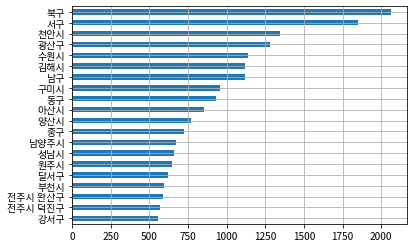

In [14]:
df['시군구명'].value_counts()[:20].sort_values().plot(kind='barh', grid=True)

plt.show()

In [15]:
df['소재지도로명주소'][0]

'강원도 원주시 시청로 496-1 101동 102호(관설동, 코아루아파트)'

In [16]:
from geocoder import geocode

geocode('강원도 원주시 시청로 496-1 101동 102호(관설동, 코아루아파트)')

(37.31397292792154, 127.96216997926722)

In [17]:
sample_df = df.sample(n=200, random_state=1)

lats = []
lngs = []

for i, index in enumerate(sample_df.index):
    print(i + 1, index)
    lat, lng = geocode(df['소재지도로명주소'][index])
    lats.append(lat or 0)
    lngs.append(lng or 0)

sample_df = sample_df.assign(lat=lats, lng=lngs)

sample_df.head()

1 4249
2 37096
3 27918
4 33058
5 4117
6 45006
7 43107
8 14434
9 12966
10 36255
11 22379
12 11547
13 47287
14 46504
15 6257
16 487
17 21640
18 40344
19 38817
20 9300
21 31697
22 1974
23 18813
24 11223
25 31934
26 391
27 2039
28 26614
29 47302
30 45640
31 19701
32 21234
33 4465
34 40886
35 23089
36 47806
37 4046
38 43385
39 46950
40 15357
41 21104
42 2207
43 5604
44 20190
45 23871
46 46183
47 45748
48 46792
49 6826
50 35629
51 28858
52 41478
53 17769
54 10947
55 30110
56 25404
57 5601
58 40331
59 15661
60 27850
61 6847
62 44664
63 7771
64 38525
65 30418
66 34815
67 12569
68 16923
69 44886
70 19866
71 5024
72 18340
73 23146
74 3963
75 38758
76 24246
77 32596
78 11251
79 8380
80 2551
81 14040
82 9086
83 9350
84 1944
85 34315
86 31722
87 407
88 31185
89 5068
90 39878
91 34661
92 20885
93 44021
94 9772
95 31928
96 20994
97 271
98 38652
99 9474
100 25986
101 23414
102 33674
103 8212
104 931
105 21689
106 23344
107 32555
108 41489
109 28438
110 39525
111 8181
112 43983
113 2742
114 30957
115 1

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,어린이집전화번호,어린이집팩스번호,보육실수,놀이터수,CCTV설치수,통학차량운영여부,홈페이지주소,데이터기준일자,제공기관코드,제공기관명,Unnamed: 17,lat,lng
4249,신나는 어린이집,충청남도,당진시,가정,20,4.0,충청남도 당진시 당진중앙2로 212-10 2동 105호( 읍내동 25-6 2동 105호),041-0352-4136,NaN,4.0,0.0,4.0,Y,NaN,2018-08-21,5680000,충청남도 당진시,NaN,36.895987,126.635300
37096,현대미포조선어린이집,울산광역시,동구,직장,42,5.0,울산광역시 동구 문현1길 1 문현관3동 1층 (방어동),052-235-6003,052-235-6067,9.0,1.0,5.0,N,http://www.childcare.go.kr,2019-05-31,3710000,울산광역시 동구,NaN,35.487157,129.414435
27918,꼬망새어린이집,전라북도,익산시,가정,15,6.0,전라북도 익산시 고봉로34길 5-2,063-831-9459,NaN,3.0,0.0,0.0,Y,NaN,2019-06-28,6450000,전라북도,NaN,35.960953,126.972251
33058,작은숲 키큰나무어린이집,경상남도,진주시,가정,20,5.0,"경상남도 진주시 새평거로 111 312동 102호 (평거동, 평거휴먼시아3단지)",055-745-6988,055-741-7988,4.0,0.0,4.0,Y,NaN,2019-04-03,5310000,경상남도 진주시,NaN,35.170494,128.059159
4117,드림아이어린이집,부산광역시,북구,가정,19,4.0,"부산광역시 북구 금곡대로 166 103동 103호(화명동, 롯데캐슬카이저)",051-900-9800,051-0000-0000,3.0,0.0,4.0,N,NaN,2019-05-28,3320000,부산광역시 북구,NaN,35.222505,129.011338


In [18]:
map = Map(location=[37.4926239, 126.9775045], zoom_start=9)

data = sample_df[['lat', 'lng']].groupby(['lat', 'lng']).sum().reset_index().values.tolist()

HeatMap(data=data, radius=20).add_to(map)

for lat, lng in data:
    marker = folium.Circle(
        location=[lat, lng],
        radius=500,
        weight=1,
        fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map